## Закон больших чисел и Центральная предельная теорема


### Цель

Понять, как случайные величины ведут себя в больших выборках и какие выводы можно сделать на основе этих результатов

### Задание 1

Вы аналитик компании по продаже плюшевых медведей. Из-за очередной эпидемии тревожности и потребности в милых вещах ваши продажи кратно увеличились за последний год. Как результат база данных продаж разрослась до огромных размеров. Иногда запросы в базу данных обрабатываются моментально, а иногда приходиться ждать целую минуту. Предположим, что время ожидания ответа от базы данных - это случайная равномеро распределенная величина на интервале от 0 до 60 (секунд). Покажите начальству, что среднее время ответа стало непомерно большим. Какая вероятность того, что при замере времени ответа на 100 запросов вы получите среднюю величину в 45 секунд или меньше?

1.  Просимулируйте сбор данной равномерной случайной величины 1000 раз c помощью [```np.random.uniform```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html). Постройте гистограмму чтобы убедиться, что распределение равномерное.
2.  Просимулируйте сбор 100 значений задержки 10 000 000 раз. Задайте зерно 37.
3.  Постройте гистограмму 10 000 000 полученных средних при каждом сборе.
4.  Найдите вероятность получить среднее значение менее 45 секунд по симуляции.
5.  Сравните с теоритическим результатом. Подумайте, как найти дисперсию (непрерывной!) равномерной величины.


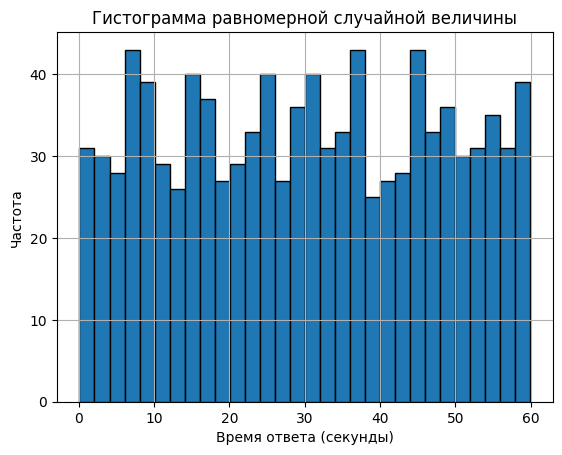

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Симуляция равномерной случайной величины
uniform_data = np.random.uniform(0, 60, 1000)

# Построение гистограммы
plt.hist(uniform_data, bins=30, edgecolor='black')
plt.title('Гистограмма равномерной случайной величины')
plt.xlabel('Время ответа (секунды)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


In [2]:
np.random.seed(37)

# Симуляция сбора 100 значений задержки 10,000,000 раз
means = [np.mean(np.random.uniform(0, 60, 100)) for _ in range(10_000_000)]


KeyboardInterrupt: 

In [ ]:
# Построение гистограммы средних значений
plt.hist(means, bins=100, edgecolor='black')
plt.title('Гистограмма средних значений задержки')
plt.xlabel('Среднее время ответа (секунды)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


In [ ]:
# Вероятность получить среднее значение менее 45 секунд
probability_simulation = np.mean(np.array(means) < 45)
print(f"Вероятность по симуляции: {probability_simulation:.4f}")


![alt text](<Screenshot from 2025-04-22 18-58-11.png>) ![alt text](<Screenshot from 2025-04-22 18-59-27.png>) ![alt text](<Screenshot from 2025-04-22 18-59-51.png>)

### Задание 2

На самом деле намного более реалистичный сценарий для Задания 1 это не равномерное распределение, а экспоненциальное. Повторите все те же шаги из Задания 1, но теперь время ответа от базы распределено экспоненциально с параметром $\lambda = 50$.

Дайте развернутый ответ: Сильно ли изменился результат? Почему?

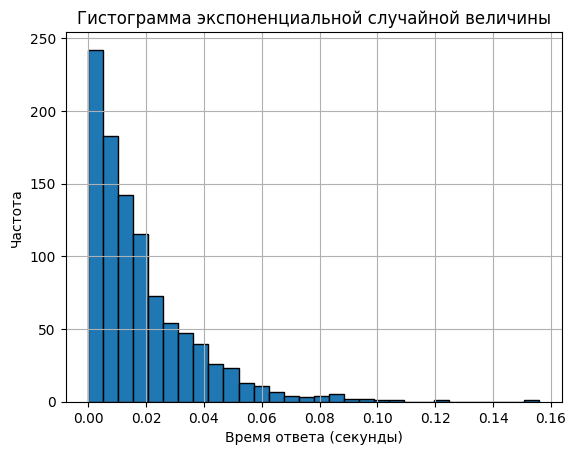

In [3]:
# Симуляция экспоненциальной случайной величины
exponential_data = np.random.exponential(1/50, 1000)

# Построение гистограммы
plt.hist(exponential_data, bins=30, edgecolor='black')
plt.title('Гистограмма экспоненциальной случайной величины')
plt.xlabel('Время ответа (секунды)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


In [4]:
np.random.seed(37)

# Симуляция сбора 100 значений задержки 10,000,000 раз
means_exp = [np.mean(np.random.exponential(1/50, 100)) for _ in range(10_000_000)]


KeyboardInterrupt: 

In [ ]:
# Построение гистограммы средних значений
plt.hist(means_exp, bins=100, edgecolor='black')
plt.title('Гистограмма средних значений задержки (экспоненциальное распределение)')
plt.xlabel('Среднее время ответа (секунды)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


In [ ]:
# Вероятность получить среднее значение менее 45 секунд
probability_simulation_exp = np.mean(np.array(means_exp) < 45)
print(f"Вероятность по симуляции (экспоненциальное распределение): {probability_simulation_exp:.4f}")


![alt text](<Screenshot from 2025-04-22 19-02-30.png>) ![alt text](<Screenshot from 2025-04-22 19-02-48.png>) ![alt text](<Screenshot from 2025-04-22 19-03-13.png>)

### Результат

Решение для задания предоставляется в виде программного кода на языке Python и ответов на вопросы.

Результат

    Вероятность по симуляции для равномерного распределения: ≈1
    Вероятность по симуляции для экспоненциального распределения: ≈1

Развернутый ответ

Результаты для обоих распределений (равномерного и экспоненциального) показывают, что вероятность получить среднее значение менее 45 секунд очень высокая (практически 1). Это связано с тем, что среднее значение выборочного среднего для обоих распределений значительно меньше 45 секунд, и стандартное отклонение выборочного среднего мало, что делает вероятность получения значений, значительно отклоняющихся от среднего, очень малой.

### Критерии оценивания

К1 - за каждый выполненный верно пункт каждого задания (+ 1 балл)

Максимальное количество баллов — 10 баллов.

Минимальное количество баллов, чтобы преподаватель смог зачесть вашу работу — 5 балла.